In [1]:
# Importing the necessary packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pathlib
 
# Setting the random seed of tensorflow
tf.random.set_seed(1)

# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Creating the Pathlib PATH objects
train_path = pathlib.Path("/content/drive/MyDrive/Python_files/FruitsData/Training")
test_path  = pathlib.Path("/content/drive/MyDrive/Python_files/FruitsData/Test")

In [3]:
# Collecting all the paths inside Training and Test folders
train_image_paths = train_path.glob('*/*.jpg')
test_image_paths = test_path.glob('*/*.jpg')
train_image_paths = list(train_image_paths)
test_image_paths = list(test_image_paths)

train_image_paths[:10]

[PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_26_100.jpg'),
 PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/327_100.jpg'),
 PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_288_100.jpg'),
 PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_86_100.jpg'),
 PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_150_100.jpg'),
 PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_142_100.jpg'),
 PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/31_100.jpg'),
 PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/189_100.jpg'),
 PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/67_100.jpg'),
 PosixPath('/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_283_100.jpg')]

In [4]:
# Getting the image paths for training data
train_image_paths = list(map(lambda x: str(x) , train_image_paths))
train_image_paths[:10]

['/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_26_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/327_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_288_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_86_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_150_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_142_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/31_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/189_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/67_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Training/Cocos/r_283_100.jpg']

In [5]:
# Getting the image paths for test data
test_image_paths = list(map(lambda x: str(x) , test_image_paths))
test_image_paths[:10]

['/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/66_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/r_158_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/120_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/r_279_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/102_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/100_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/r_290_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/53_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/65_100.jpg',
 '/content/drive/MyDrive/Python_files/FruitsData/Test/Granadilla/88_100.jpg']

In [6]:
# Shuffling the training and test data
from random import shuffle
shuffle(train_image_paths)
shuffle(test_image_paths)

In [7]:
# Getting the labels of the training data 
def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(get_label, train_image_paths))
np.array(train_image_labels[:10])

array(['Strawberry', 'Avocado ripe', 'Apple Red 3', 'Pineapple',
       'Maracuja', 'Banana Lady Finger', 'Physalis', 'Corn Husk',
       'Papaya', 'Cherry Wax Red'], dtype='<U18')

In [8]:
# Getting the labels of the test data 
test_image_labels = list(map(get_label, test_image_paths))
np.array(test_image_labels[:10])

array(['Kohlrabi', 'Pear Stone', 'Tomato Heart', 'Granadilla', 'Kaki',
       'Cherry Rainier', 'Cauliflower', 'Pear Abate',
       'Melon Piel de Sapo', 'Cantaloupe 2'], dtype='<U18')

In [9]:
# Number of classes in the datasets
print('No. of classes in the training data:', pd.Series(train_image_labels).nunique())
print('No. of classes in the test data:', pd.Series(test_image_labels).nunique())

No. of classes in the training data: 131
No. of classes in the test data: 131


In [10]:
# Quantifying the labels
from sklearn.preprocessing import LabelEncoder 

# Encoding the labels of training and test data
Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)
test_image_labels  = Le.transform(test_image_labels)
train_image_labels[:10]

array([116,  15,   9,  99,  67,  17,  97,  36,  78,  30])

In [11]:
# Dividing the test data into validation and test sets
from sklearn.model_selection import train_test_split 
Test_paths, Val_paths, Test_labels, Val_labels = train_test_split(test_image_paths, test_image_labels, test_size = 0.5,
                                                                  shuffle = True, random_state = 1, stratify = test_image_labels)
Train_paths  = train_image_paths
Train_labels = train_image_labels

In [12]:
# One-hot encoding of labels
Train_labels = tf.keras.utils.to_categorical(Train_labels)
Val_labels   = tf.keras.utils.to_categorical(Val_labels)
Test_labels  = tf.keras.utils.to_categorical(Test_labels)
Train_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# Checking the size of training, validation and test sets
print('The length of the training set:', len(Train_paths))
print('The length of the validation set:', len(Val_paths))
print('The length of the test set:', len(Test_paths))

The length of the training set: 67712
The length of the validation set: 11344
The length of the test set: 11344


In [14]:
# Function used for loading and quantifying images
def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [15]:
# Define the image and batch sizes 
IMG_SIZE = 224 
BATCH_SIZE = 64

# Resizing layer
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.2, 0.2))
])

In [16]:
# Functions used to create a tensorflow data object to prepare data for CNN implementation
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths, labels, train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

    dataset = dataset.map(lambda image, label: load(image, label))
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), 
                              num_parallel_calls = AUTOTUNE)  
        dataset = dataset.repeat()
    return dataset

In [17]:
# Creating the CNN-compatible training set and verifying it
train_set = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_set))
print(image.shape)
print(label.shape)

(64, 224, 224, 3)
(64, 131)


Cherry Rainier


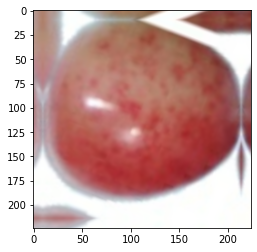

In [18]:
# View a sample training image
print(Le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow(image[0].numpy()/255);

In [19]:
# Creating the CNN-compatible validation set and verifying it
val_set = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_set))
print(image.shape)
print(label.shape)

(64, 224, 224, 3)
(64, 131)


Peach Flat


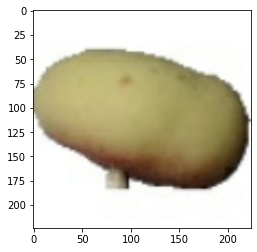

In [20]:
# View a sample validation image
print(Le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255));

In [21]:
# Creating the CNN-compatible test set and verifying it
test_set = get_dataset(Test_paths, Test_labels, train = False)

image, label = next(iter(test_set))
print(image.shape)
print(label.shape)

(64, 224, 224, 3)
(64, 131)


Pear Forelle


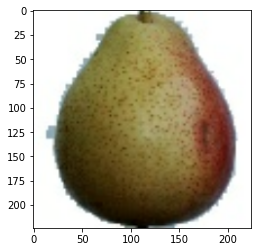

In [22]:
# View a sample test image
print(Le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255));

In [23]:
# Building EfficientNetB3 model
from tensorflow.keras.applications import EfficientNetB3

backbone = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 1536)       6144      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1536)             6144      
 hNormalization)                                       

In [24]:
# Compiling your model by providing the optimizer, loss and performance metrics
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(name = 'precision'), tf.keras.metrics.Recall(name = 'recall')]
)

In [25]:
# Training the model
history = model.fit(
    train_set,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 1,
    validation_data = val_set,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

1058/1058 [==============================] - 1658s 2s/step - loss: 0.2450 - accuracy: 0.9416 - precision: 0.9745 - recall: 0.9243 - val_loss: 0.1861 - val_accuracy: 0.9494 - val_precision: 0.9533 - val_recall: 0.9467


#### Notes:

Here, we adopt a two-step approach to train our model. In the first approach, we'll train the entire model, including the top layers of the EfficientNetB3 (backbone) and all the weights, for only one epoch. In the second step, we train only the last FC layer, specific to this problem and dataset. 

In [26]:
# Turning off the backbone
model.layers[0].trainable = False

# Defining our callbacks 
best_model = tf.keras.callbacks.ModelCheckpoint("efficientnet_weights.tf", verbose = 1, monitor = 'val_accuracy', mode = 'max',
                                                save_best_only = True, save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience = 5, verbose = 1)

# Viewing the summary of the model for which thefirst layer (backbone) is turned off
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 1536)       6144      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1536)             6144      
 hNormalization)                                                 
                                                      

In [27]:
# Training the model
history = model.fit(
    train_set,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 10,
    callbacks = [best_model, early_stop],
    validation_data = val_set,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/10
1058/1058 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9841 - precision: 0.9857 - recall: 0.9829
Epoch 1: val_accuracy improved from -inf to 0.96654, saving model to efficientnet_weights.h5
1058/1058 [==============================] - 690s 651ms/step - loss: 0.0579 - accuracy: 0.9841 - precision: 0.9857 - recall: 0.9829 - val_loss: 0.1216 - val_accuracy: 0.9665 - val_precision: 0.9747 - val_recall: 0.9641
Epoch 2/10
1058/1058 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9836 - precision: 0.9849 - recall: 0.9828
Epoch 2: val_accuracy did not improve from 0.96654
1058/1058 [==============================] - 685s 646ms/step - loss: 0.0627 - accuracy: 0.9836 - precision: 0.9849 - recall: 0.9828 - val_loss: 0.1977 - val_accuracy: 0.9550 - val_precision: 0.9613 - val_recall: 0.9529
Epoch 3/10
1058/1058 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.9917 - precision: 0.9923 - recall: 0.9913
Epoch 3: val_

In [32]:
# Loading the the optimal weights into the into the model
model.load_weights('efficientnet_weights.tf')

# Saving the optimal EfficientNetB3 model
model.save('OptimalEfficientNet.tf')

In [33]:
# Loading the optimal EfficientNet model
efficientnet_model = tf.keras.models.load_model('OptimalEfficientNet.tf')

# Evaluating the performance metrics on the test set
loss, acc, recall, prec = efficientnet_model.evaluate(test_set)
print('The EfficientNet model accuracy on the test set is {}.'.format(round(acc, 3)))
print('The EfficientNet model recall score on the test set is {}.'.format(round(recall, 3)))
print('The EfficientNet model precision score on the test set is {}.'.format(round(prec, 3)))

178/178 [==============================] - 226s 1s/step - loss: 0.1375 - accuracy: 0.9824 - precision: 0.9830 - recall: 0.9823
The EfficientNet model accuracy on the test set is 0.982.
The EfficientNet model recall ascore on the test set is 0.983.
The EfficientNet model precision ascore on the test set is 0.982.


In [90]:
# Function for turning a single image address into a TF object
def convert_path_to_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE), method = 'bicubic')
    plt.imshow(np.clip(image.numpy()/255, 0, 1));
    image = tf.expand_dims(image , 0)
    return image

# A function which receives a TF image object and returns its class
def image_prediction(image_path, model, encoder):
    image = convert_path_to_image(image_path)
    class_pred = model.predict(image, verbose = 0)
    class_pred = encoder.inverse_transform(np.argmax(class_pred)*np.ones(1, 
                                                                  dtype = int))[0]
    return class_pred

The actual fruit: Apple Golden 2
The predicted fruit: Apple Golden 2


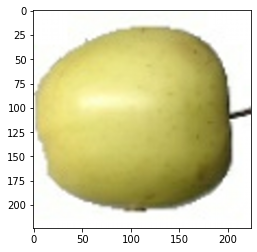

In [94]:
# Selecting the type of the actual fruit
fruit_type = 'Apple Golden 2'

# Accessing the directory of fruit and making a list of addresses of all fruits in the directory 
fruit_path = pathlib.Path("/content/drive/MyDrive/Python_files/FruitsData/Test/" + fruit_type)
fruit_path = list(fruit_path.glob('*.jpg')) 
fruit_path = list(map(lambda x: str(x), fruit_path))

# Shuffling the paths of the certain fruit directory
shuffle(fruit_path)
# Picking the first object in the list for testing
fruit_path = fruit_path[0]
true_label = fruit_path.split('/')[-2] 

image = convert_path_to_image(fruit_path)

# Predictiong the type of the fruit
pred_label = image_prediction(fruit_path, efficientnet_model, Le)
print('The actual fruit:', true_label)
print('The predicted fruit:', pred_label)